In [1]:
"""
用来批量回测做对比，变量是品种
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.num1_breaker.r_break_strategy_5 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

*****************************************
开始回测BU99.SHFE:
2020-02-23 20:44:17.741404	开始加载历史数据
2020-02-23 20:44:34.520869	历史数据加载完成，数据量：166335
2020-02-23 20:44:34.621616	策略初始化完成
2020-02-23 20:44:34.621616	开始回放历史数据
2020-02-23 20:44:38.400517	历史数据回放结束
2020-02-23 20:44:38.400517	开始计算逐日盯市盈亏
2020-02-23 20:44:38.406485	逐日盯市盈亏计算完成
*****************************************
开始回测FU99.SHFE:
2020-02-23 20:44:38.407451	开始加载历史数据
2020-02-23 20:44:47.007661	历史数据加载完成，数据量：148980
2020-02-23 20:44:47.102407	策略初始化完成
2020-02-23 20:44:47.102407	开始回放历史数据
2020-02-23 20:44:50.776902	历史数据回放结束
2020-02-23 20:44:50.777851	开始计算逐日盯市盈亏
2020-02-23 20:44:50.782911	逐日盯市盈亏计算完成
*****************************************
开始回测RB99.SHFE:
2020-02-23 20:44:50.783862	开始加载历史数据
2020-02-23 20:44:59.681503	历史数据加载完成，数据量：166335
2020-02-23 20:44:59.793217	策略初始化完成
2020-02-23 20:44:59.793217	开始回放历史数据
2020-02-23 20:45:03.104820	历史数据回放结束
2020-02-23 20:45:03.104820	开始计算逐日盯市盈亏
2020-02-23 20:45:03.109816	逐日盯市盈亏计算完成
*******************************

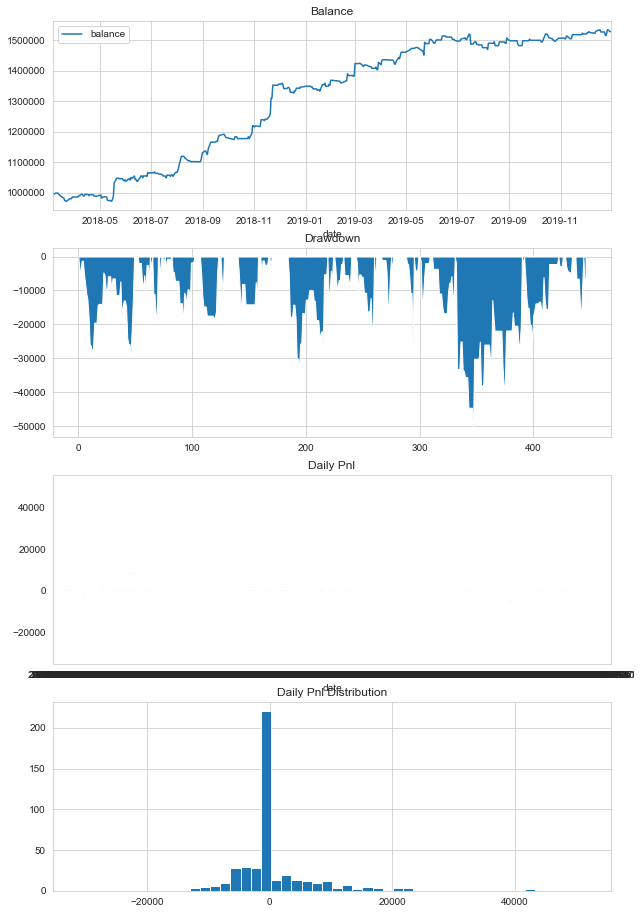

*****************************************
FU99.SHFE 回测数据:
2020-02-23 20:45:27.290695	开始计算策略统计指标
2020-02-23 20:45:27.297635	------------------------------
2020-02-23 20:45:27.297635	首个交易日：	2018-03-06
2020-02-23 20:45:27.297635	最后交易日：	2019-12-31
2020-02-23 20:45:27.297635	总交易日：	437
2020-02-23 20:45:27.297635	盈利交易日：	75
2020-02-23 20:45:27.297635	亏损交易日：	172
2020-02-23 20:45:27.297635	起始资金：	1,000,000.00
2020-02-23 20:45:27.297635	结束资金：	1,029,128.45
2020-02-23 20:45:27.297635	总收益率：	2.91%
2020-02-23 20:45:27.297635	年化收益：	1.60%
2020-02-23 20:45:27.297635	最大回撤: 	-153,168.69
2020-02-23 20:45:27.297635	百分比最大回撤: -15.32%
2020-02-23 20:45:27.297635	最长回撤天数: 	259
2020-02-23 20:45:27.297635	总盈亏：	29,128.45
2020-02-23 20:45:27.297635	总手续费：	36,272.95
2020-02-23 20:45:27.297635	总滑点：	86,800.00
2020-02-23 20:45:27.297635	总成交金额：	1,209,098,453.24
2020-02-23 20:45:27.297635	总成交笔数：	868
2020-02-23 20:45:27.297635	日均盈亏：	66.66
2020-02-23 20:45:27.297635	日均手续费：	83.00
2020-02-23 20:45:27.297635	日均滑点：	198.63
2020-02-2

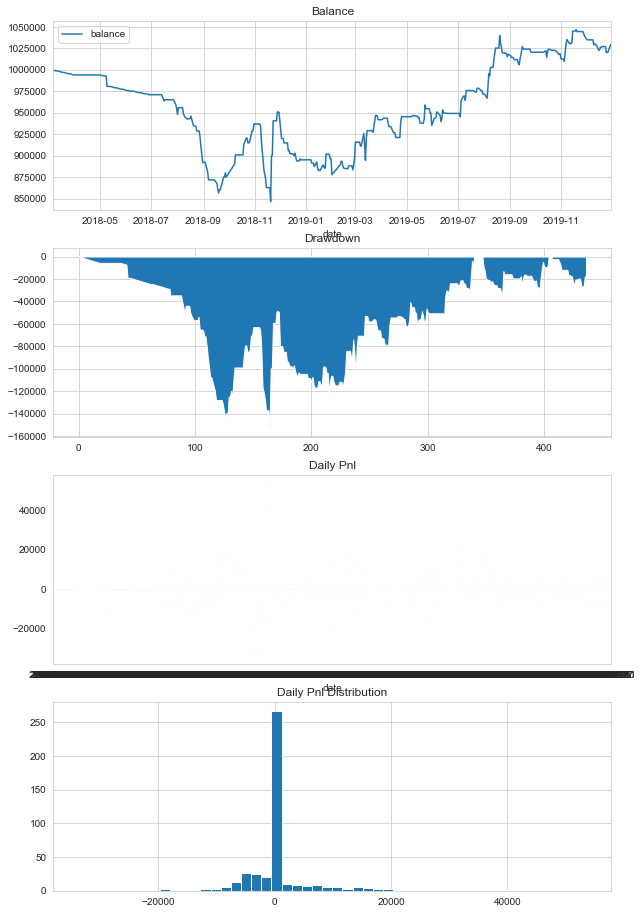

*****************************************
RB99.SHFE 回测数据:
2020-02-23 20:45:35.830111	开始计算策略统计指标
2020-02-23 20:45:35.837055	------------------------------
2020-02-23 20:45:35.837055	首个交易日：	2018-03-06
2020-02-23 20:45:35.837055	最后交易日：	2019-12-31
2020-02-23 20:45:35.837055	总交易日：	447
2020-02-23 20:45:35.837055	盈利交易日：	111
2020-02-23 20:45:35.837055	亏损交易日：	139
2020-02-23 20:45:35.837055	起始资金：	1,000,000.00
2020-02-23 20:45:35.837055	结束资金：	1,213,411.14
2020-02-23 20:45:35.837055	总收益率：	21.34%
2020-02-23 20:45:35.837055	年化收益：	11.46%
2020-02-23 20:45:35.837055	最大回撤: 	-75,811.67
2020-02-23 20:45:35.837055	百分比最大回撤: -6.30%
2020-02-23 20:45:35.837055	最长回撤天数: 	36
2020-02-23 20:45:35.837055	总盈亏：	213,411.14
2020-02-23 20:45:35.837055	总手续费：	43,715.29
2020-02-23 20:45:35.837055	总滑点：	79,200.00
2020-02-23 20:45:35.837055	总成交金额：	1,457,176,243.66
2020-02-23 20:45:35.837055	总成交笔数：	792
2020-02-23 20:45:35.837055	日均盈亏：	477.43
2020-02-23 20:45:35.837055	日均手续费：	97.80
2020-02-23 20:45:35.837055	日均滑点：	177.18
2020-02

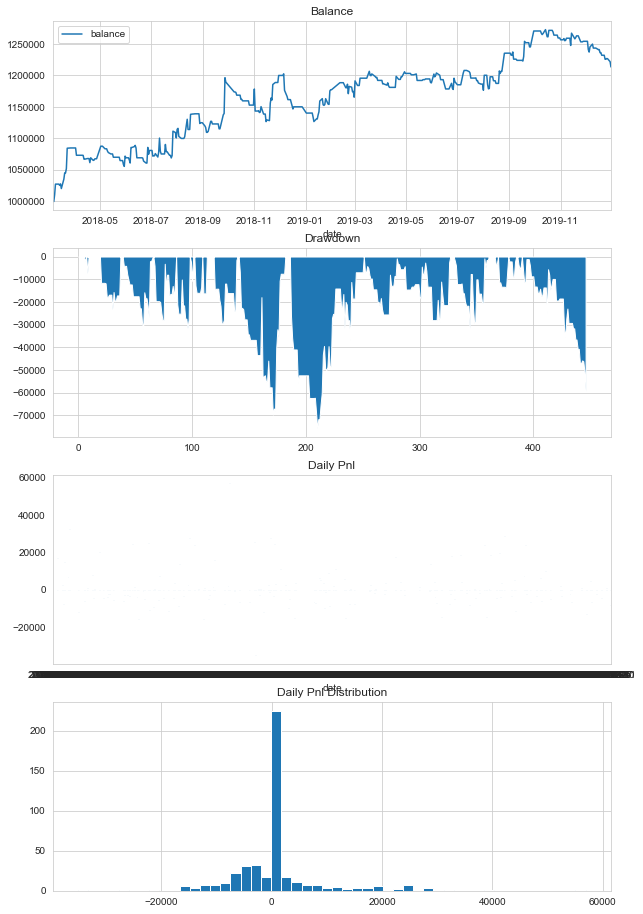

*****************************************
SR99.CZCE 回测数据:
2020-02-23 20:45:44.380607	开始计算策略统计指标
2020-02-23 20:45:44.387587	------------------------------
2020-02-23 20:45:44.387587	首个交易日：	2018-03-06
2020-02-23 20:45:44.388585	最后交易日：	2019-12-31
2020-02-23 20:45:44.388585	总交易日：	447
2020-02-23 20:45:44.388585	盈利交易日：	124
2020-02-23 20:45:44.388585	亏损交易日：	144
2020-02-23 20:45:44.388585	起始资金：	1,000,000.00
2020-02-23 20:45:44.388585	结束资金：	1,401,440.39
2020-02-23 20:45:44.388585	总收益率：	40.14%
2020-02-23 20:45:44.388585	年化收益：	21.55%
2020-02-23 20:45:44.388585	最大回撤: 	-69,154.27
2020-02-23 20:45:44.388585	百分比最大回撤: -5.97%
2020-02-23 20:45:44.388585	最长回撤天数: 	36
2020-02-23 20:45:44.388585	总盈亏：	401,440.39
2020-02-23 20:45:44.388585	总手续费：	46,954.95
2020-02-23 20:45:44.388585	总滑点：	60,000.00
2020-02-23 20:45:44.388585	总成交金额：	1,565,165,038.15
2020-02-23 20:45:44.388585	总成交笔数：	600
2020-02-23 20:45:44.388585	日均盈亏：	898.08
2020-02-23 20:45:44.388585	日均手续费：	105.04
2020-02-23 20:45:44.388585	日均滑点：	134.23
2020-0

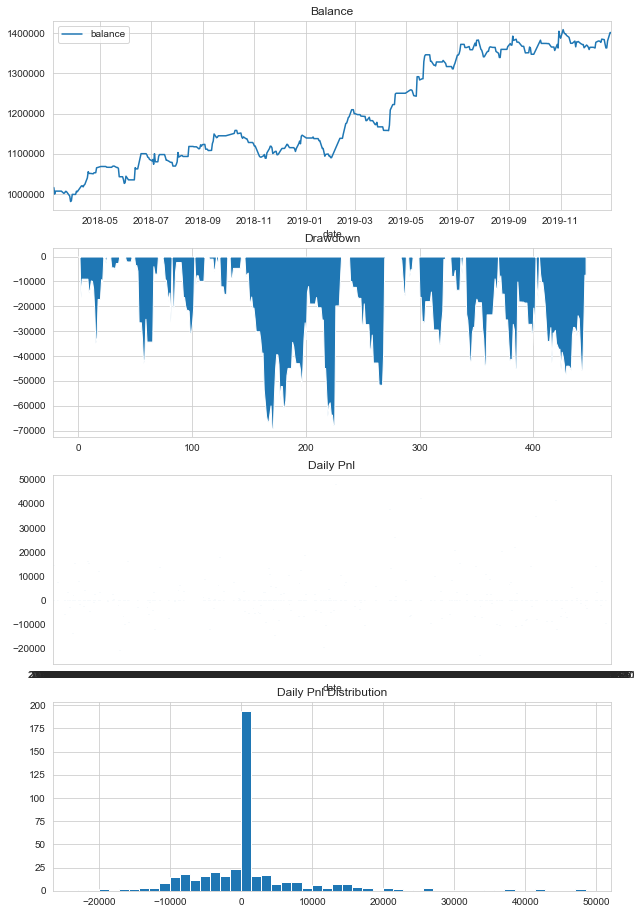

In [2]:
varieties = [
    "BU99.SHFE",
    "FU99.SHFE",
    "RB99.SHFE",
    "SR99.CZCE"
]

engine_dict = {}
for item in varieties:
    print('*****************************************')
    print(f'开始回测{item}:')

    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=item,
        interval="1m",
        start=datetime(2018, 1, 1),
        end=datetime(2020, 11, 15),
        rate=0.3/10000, # 保证金比例
        slippage=0.2,  # 滑点
        size=10,  # 合约乘数
        pricetick=0.2, # 最小价格变动
        capital=1_000_000,
    )
    engine.add_strategy(RBreakStrategy, {
        'fixed_size': 50
    })

    engine.load_data()
    engine.run_backtesting()
    engine.calculate_result()
    engine_dict[item] = engine

for key_engine, item_engine in engine_dict.items():
    print('*****************************************')
    print(f'{key_engine} 回测数据:')
    item_engine.calculate_statistics()
    item_engine.show_chart()